C:\Users\israe\AppData\Local\Temp\ipykernel_2296\2687427188.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')


<Axes: xlabel='disc_year', ylabel='Count'>

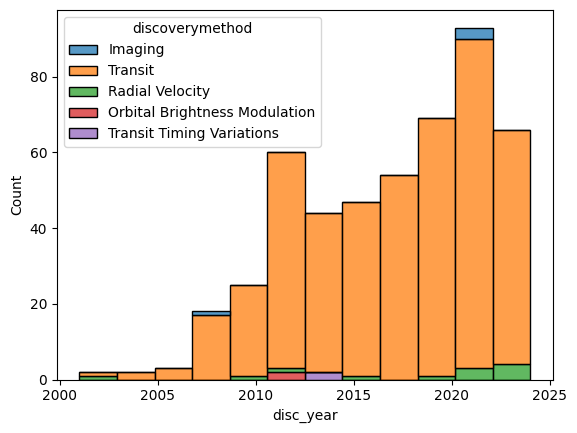

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')
# Dejar solo planeta confirmados, metodo deteccion, nombre planeta, periodo orbital, año de descubrimiento, masa y radio del planeta tierra
col_list = ['pl_name', 'discoverymethod', 'disc_year','pl_orbper','soltype', 'pl_rade','pl_masse','st_mass']
df = df[col_list]
# Dejar planetas confirmados unicos
df_filter = df.drop_duplicates(subset=['pl_name'])
# Drop filas con valores nulos
df_filter = df_filter.dropna()
# Dropear columna pl_name
df_filter = df_filter.drop(columns=['pl_name'])
# Hacer histograma de años disc_year vs metodos de descubrimiento discoverymethod
sns.histplot(data=df_filter, x='disc_year', hue='discoverymethod', multiple='stack')





Text(0.5, 0, 'Cantidad de planetas')

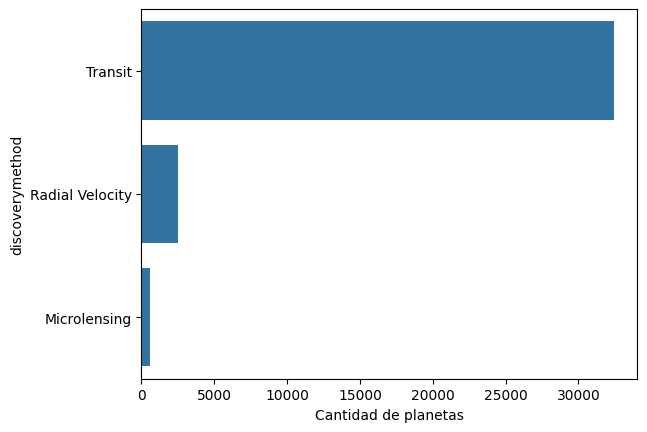

In [12]:
# Cuales son las 3 tecnicas de descubrimiento mas comunes
df['discoverymethod'].value_counts().head(3)
# Gráfico de barras de las 3 tecnicas de descubrimiento mas comunes
sns.countplot(data=df, y='discoverymethod', order=df['discoverymethod'].value_counts().index[:3])
# Corregir el eje x
plt.xlabel('Cantidad de planetas')

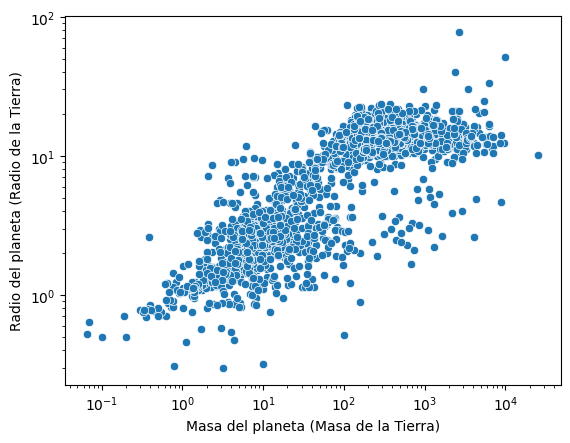

In [20]:
# Existe una relacion entre la masa del planeta y el radio del planeta?
# Incluir incertezas de cada valor
# Hacer un scatter plot con los valores de masa y radio
plt.figure()
sns.scatterplot(data=df, x='pl_masse', y='pl_rade')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masa del planeta (Masa de la Tierra)')
plt.ylabel('Radio del planeta (Radio de la Tierra)')
plt.show()


In [17]:
# Calcular la correlacion entre masa y radio
correlation = df['pl_masse'].corr(df['pl_rade'])
print(correlation)

0.3071838760716857


In [15]:
# 3 Indicadores
# Realice un breve informe maximo de 5 